# Kaggle Bike Sharing Demand
[http://www.kaggle.com/c/bike-sharing-demand](http://www.kaggle.com/c/bike-sharing-demand)

- Bike_Sharing_Demand.csv (10,886 * 12)
   - datetime : Date + Timestamp
   - season : 1(봄), 2(여름), 3(가을), 4(겨울)
   - holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
   - workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
   - weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)
   - temp : 온도(섭씨)
   - atemp : 체감온도(섭씨)
   - humidity : 습도
   - windspeed : 풍속
   - casual : 사전 등록되지 않은 사용자 대여 횟수
   - registered : 사전 등록된 사용자 대여 횟수
   - count : 총 대여 횟수 -> y

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Bike_Sharing_Demand.csv' Github에서 읽어오기

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'

df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# I. Data Preprocessing

> ## 1) 'String' -> 'Date'

* 'year', 'month', 'day', 'hour' 추출

In [4]:
df['datetime'] = df.datetime.apply(pd.to_datetime)
df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)

> ## 2) Drop Columns

- 'datetime'

In [5]:
drop_columns = ['datetime']

df.drop(drop_columns, axis = 1, inplace = True)

In [6]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


# II. 탐색적데이터분석(EDA)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

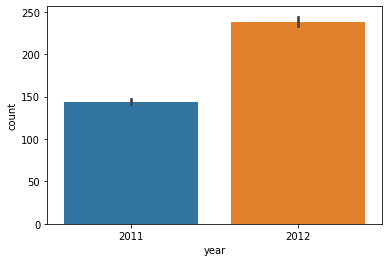

2011년에 비해 2012년의 대여 수 증가.


In [8]:
sns.barplot(x = 'year', 
            y = 'count', 
            data = df)
plt.show()
print('2011년에 비해 2012년의 대여 수 증가.') 

In [9]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

> ## 1) 'month'

In [10]:
df.groupby(['month']).count()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
month,,,,,,,,,,,,,,
1,884,884,884,884,884,884,884,884,884,884,884,884,884,884
2,901,901,901,901,901,901,901,901,901,901,901,901,901,901
3,901,901,901,901,901,901,901,901,901,901,901,901,901,901
4,909,909,909,909,909,909,909,909,909,909,909,909,909,909
5,912,912,912,912,912,912,912,912,912,912,912,912,912,912
6,912,912,912,912,912,912,912,912,912,912,912,912,912,912
7,912,912,912,912,912,912,912,912,912,912,912,912,912,912
8,912,912,912,912,912,912,912,912,912,912,912,912,912,912
9,909,909,909,909,909,909,909,909,909,909,909,909,909,909


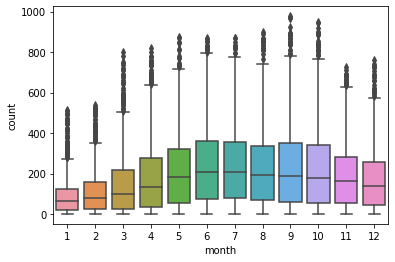

In [11]:
sns.boxplot(x = 'month', 
            y = 'count', 
            data = df)
plt.show()

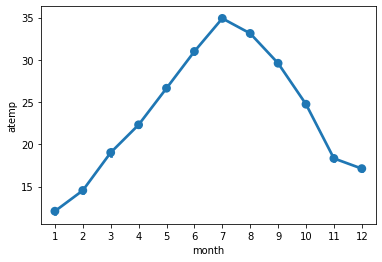

In [12]:
sns.pointplot(x = 'month', 
              y = 'atemp', 
              data = df)
plt.show()

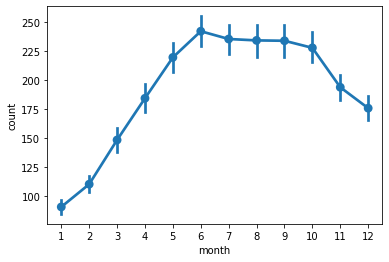

In [13]:
sns.pointplot(x = 'month', 
              y = 'count', 
              data = df)
plt.show()

# 6월의 수요가 가장 많고, 1월이 가장 적다.

> ## 2) 'atemp'

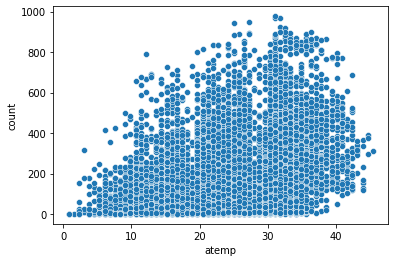

In [14]:
sns.scatterplot(x = 'atemp', 
                y = 'count', 
                data = df)
plt.show()

# 우상향 경향

> ## 3) 'season'

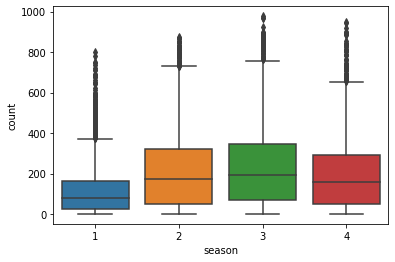

In [15]:
sns.boxplot(x = 'season', 
            y = 'count', 
            data = df)
plt.show()

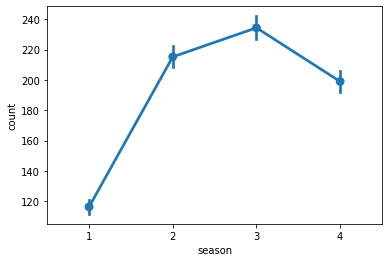

In [16]:
sns.pointplot(x = 'season', 
              y = 'count', 
              data = df)
plt.show()

# 여름, 가을 수요 높고, 봄은 낮다.

> ## 4) 'weather'

- weather

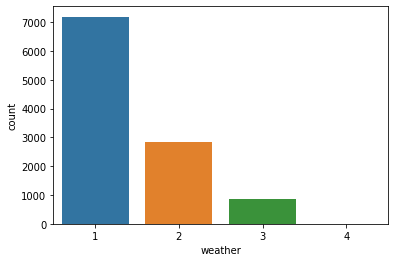

In [17]:
sns.countplot(x = 'weather', 
              data = df)
plt.show()

# 날씨별 도수
# 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)

In [18]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [19]:
df.loc[(df['weather'] == 4)]

# 심한 눈, 비, 천둥, 번개 날씨는 2년 동안 한 번

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18


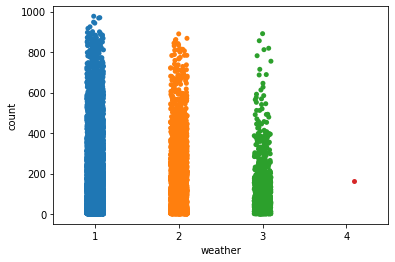

In [20]:
sns.stripplot(x = 'weather', 
              y = 'count', 
              data = df)
plt.show()

In [21]:
a = df.groupby(by = 'weather').sum()
a['count']

# 날씨가 좋을 수록 총 대여 수가 많다.

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

> ## 5) 'hour'

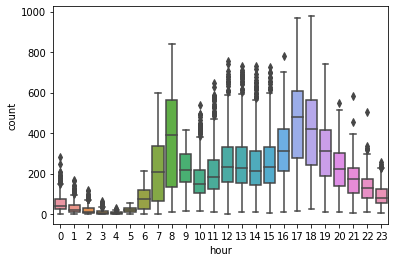

In [22]:
sns.boxplot(x = 'hour', 
            y = 'count', 
            data = df)
plt.show()

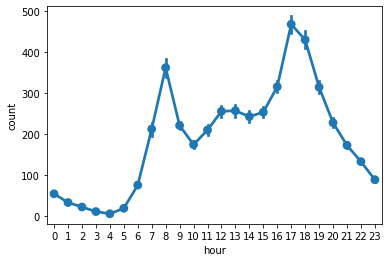

In [23]:
sns.pointplot(x = 'hour', 
              y = 'count', 
              data = df)
plt.show()

# 출근시간대와 퇴근시간대에 수요가 높다.

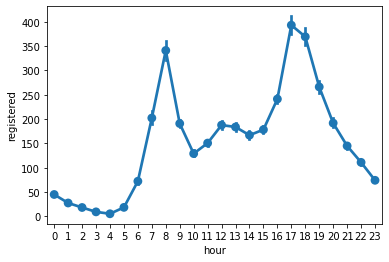

In [24]:
sns.pointplot(x = 'hour', 
              y = 'registered', 
              data = df)
plt.show()

# 예약을 하고 대여하는 횟수가 시간대별 빈도 그래프와 거의 일치
# 출근, 퇴근 시간대의 이용자들은 정기적으로 대여하는 고객인 것 같음

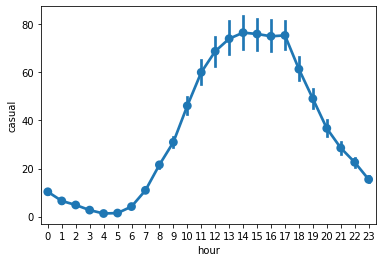

In [25]:
sns.pointplot(x = 'hour', 
              y = 'casual', 
              data = df)
plt.show()

# 반면, 예약을 하지 않고 대여할 땐 출근, 퇴근 시간대보다는 낮시간 전반적으로 많이 이용

> ## 6) 'workingday' -> 'registered'

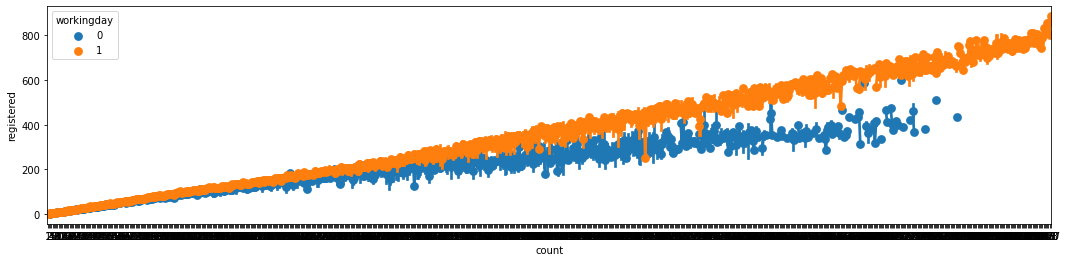

In [26]:
plt.figure(figsize = (18, 4))
sns.pointplot(x = 'count', 
              y = 'registered', 
              hue = 'workingday', 
              data = df)
plt.show()

# 주중에 예약한 대여 수가 많고, 주말은 그에 비해 적음
# hour의 결과에 더해서 예약 대여한 자전거는 출퇴근 목적임을 예상

> ## 7) 'workingday' -> 'casual'

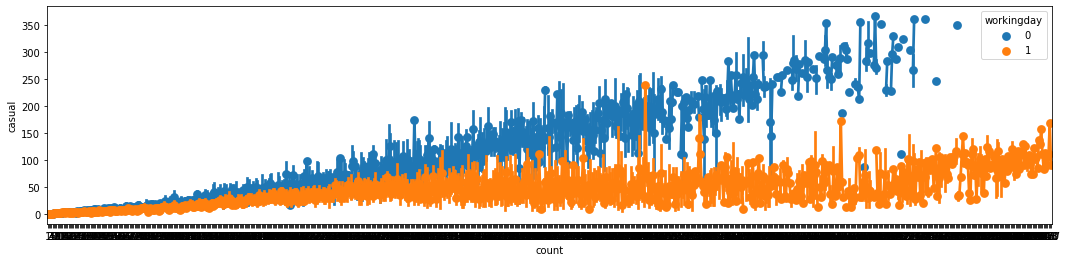

In [27]:
plt.figure(figsize = (18, 4))
sns.pointplot(x = 'count', 
              y = 'casual', 
              hue = 'workingday', 
              data = df)
plt.show()

# 반대로, 주말엔 예약하지 않은 자전거 대여 수가 많고, 주중은 적다.

# III. 변수 선택

- X : 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual', 'registered' 
- y : 'count'

In [28]:
df1 = df[[ 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual', 'registered', 'count']]
df1.head()

,month,day,hour,season,holiday,workingday,weather,atemp,casual,registered,count
0,1,1,0,1,0,0,1,14.395,3,13,16
1,1,1,1,1,0,0,1,13.635,8,32,40
2,1,1,2,1,0,0,1,13.635,5,27,32
3,1,1,3,1,0,0,1,14.395,3,10,13
4,1,1,4,1,0,0,1,14.395,0,1,1


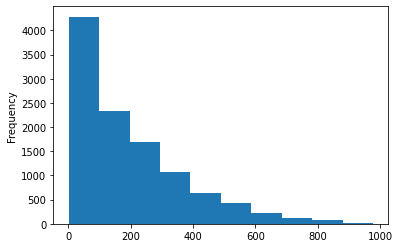

In [29]:
df['count'].plot(kind = 'hist')
plt.show()

In [30]:
df['count'].mean()

191.57413191254824

> ## 1) Train & Test Split

- 7 : 3

In [31]:
from sklearn.model_selection import train_test_split

X = df1[['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp']]
y = df1['count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7620, 8) (7620,)
Test Data :  (3266, 8) (3266,)


# IV. Multivariate Regression Modeling

> ## 1) 모델 생성

In [32]:
%%time

from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True, n_jobs = -1)

MR.fit(X_train, y_train)

CPU times: user 23.3 ms, sys: 6.03 ms, total: 29.3 ms
Wall time: 110 ms


LinearRegression(n_jobs=-1, normalize=True)

> ## 2) 모델 평가

In [33]:
from sklearn.metrics import mean_squared_error

MR_mse = np.sqrt(mean_squared_error(y_test, MR.predict(X_test)))
MR_mse

152.91172018705788

# 
# 
# 
# The End
# 
# 
# 